In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [14]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

savedir = "D03/"

In [15]:
all_data = loader.load_data( "../CloudVenetoAnalysisBis/**/" )
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

6

In [19]:
for d in data:
    # x, y = fitter.rebin_width( d['h_x'], d['h'], 0.0002 )
    x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )
    d['fits'] = fitter.fits( x, y, d, plot=False )
    d['skew'] = skew( d['chunks'], bias=True )
    d['npskew'] = ( np.mean( d['chunks'] ) - np.median( d['chunks'] ) ) / np.std( d['chunks'], ddof = 1 )
    d['Z&S'] = np.sqrt( 2 * len( d['chunks'] ) ) * ( np.mean( d['chunks'] ) - np.median( d['chunks'] ) ) / np.std( d['chunks'], ddof = 1 )
    d['kurt'] = kurtosis( d['chunks'] )

filtered_data = data
len( filtered_data )

6

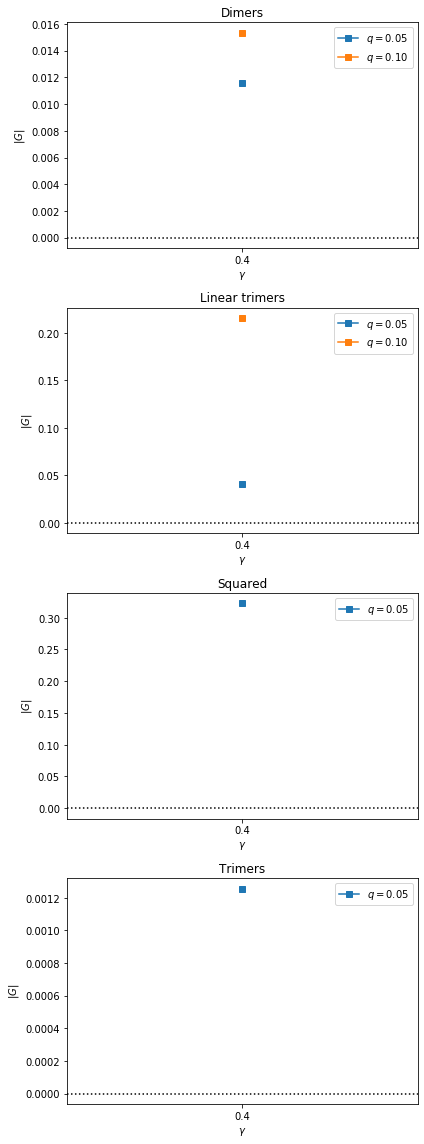

In [27]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        abs( filtered_data[d]['skew'] ),
    ],
    lambda r, c, l: [
        { 'label': fr"$q = {l:.2f}$", 'ls': '-', 'marker': 's'  }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "skewness.pdf" )

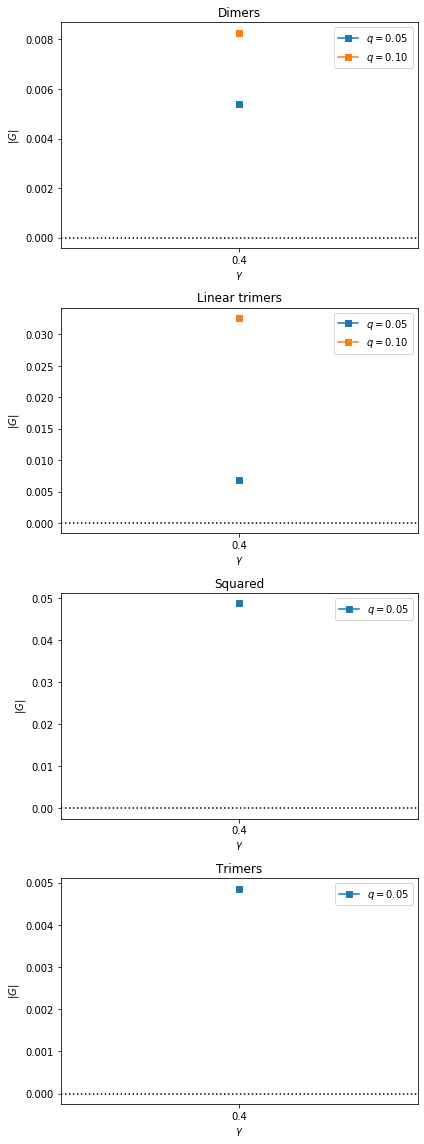

In [28]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['npskew'],
    ],
    lambda r, c, l: [
        { 'label': fr"$q = {l:.2f}$", 'ls': '-', 'marker': 's'  }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "nonparametric_skewness.pdf" )

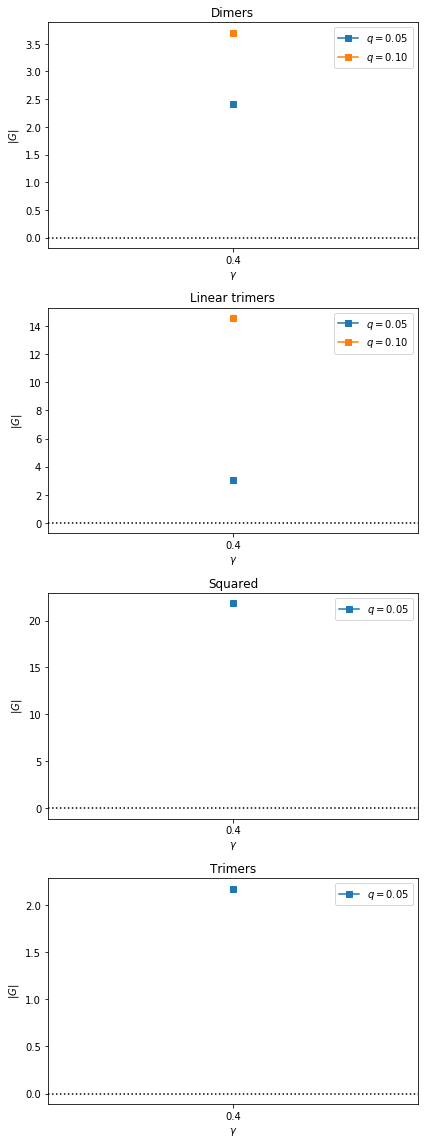

In [29]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['Z&S'],
    ],
    lambda r, c, l: [
        { 'label': fr"$q = {l:.2f}$", 'ls': '-', 'marker': 's'  }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "ZhengAndGastwirth.pdf" )